<a href="https://colab.research.google.com/github/engineerchacon/Maestria-en-Inteligencia-Artificial-y-Analitica-de-Datos-Colab-Files/blob/main/Entrega_Final_del_Proyecto_de_An%C3%A1lisis_Exploratorio_de_los_Datos_Armando_Chac%C3%B3n_Terrazas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrega Final del Proyecto de Análisis Exploratorio de los Datos

[Negocios con página web en la ciudad de Chihuahua]

Nombre: [Armando Chacón Terrazas]

Matrícula: [260498]

Fecha: [10/10/2025]

## 1) Introducción
- Descripción breve del problema que se pretende abordar.

*Queremos analizar el número de negocios que se encuentran en la localidad de Chihuahua que posiblemente no tienen una página web.*

- Objetivo general del proyecto:

*Generar una base de datos con solo la información relevante para el equipo de ventas de algun negocio web.*

Objetivos específicos:

-Seleccionar las columnas importantes del data frame.

-Filtrar solo negocios de la ciudad de Chihuahua.

-Eliminar información repetida.

-Complementar dirreción fisica si se ecuentra incompleta.

- Contexto del dataset en relación con el problema planteado.

*El Directorio Estadístico Nacional de Unidades Económicas ofrece datos de identificación, ubicación, actividad económica y tamaño de los negocios activos en el territorio nacional, actualizados, fundamentalmente, en el segmento de los establecimientos grandes.*

## 2) Descripción del dataset
Fuente de los datos.

- INEGI

Número de registros y variables.

- 42 variables (columnas) y 141,422 Observaciones (Filas).

Variables principales de interés.

- Nombre del establecimiento.

- Giro del establecimiento.

- Número de trabajadores.

- Dirreción fisica del establecimiento.

- Telefono.

- Correo Electronico.

- Página web.

- Fecha de alta del RENEM.

Limitaciones del dataset.

- Puede no tener la información al dia.

- Existen datos en blanco.

- En algunos casos se utiliza mayúsculas y minúsculas.

- Se tiene que filtrar primero la información para la ciudad de Chihuahua.



In [14]:
# 🔍 CONECTAR GOOGLE DRIVE
"""
🔗 FUNCIÓN: Conectar Google Colab con Google Drive
"""
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# 📦 IMPORTAR LIBRERÍAS NECESARIAS
"""
🐍 PANDAS: Para manipulación y análisis de datos
📊 NUMPY: Para operaciones matemáticas y estadísticas
"""
import pandas as pd
import numpy as np
print("🔥 Librerías importadas correctamente")

🔥 Librerías importadas correctamente


In [16]:
# 📂 CARGAR EL ARCHIVO CSV DESDE DRIVE
"""
📄 ARCHIVO: denue_inegi_08_.csv
📍 UBICACIÓN: /content/drive/MyDrive/PROYECTO-PROGRAMACIÓN/
🎯 FUNCIÓN: pd.read_csv() lee archivos CSV y los convierte en DataFrame
"""
print("🔄 Cargando archivo CSV desde Drive...")
# Nos generaba un error el latin1 y se tuvo que hacer con ISO-8859-1
try:
    df_original = pd.read_csv('/content/drive/MyDrive/PROYECTO-PROGRAMACIÓN/denue_inegi_08_.csv', encoding='latin1', on_bad_lines='skip')
except UnicodeDecodeError:
    print("No se puede con latin1. Intentando con ISO-8859-1.")
    df_original = pd.read_csv('/content/drive/MyDrive/PROYECTO-PROGRAMACIÓN/denue_inegi_08_.csv', encoding='ISO-8859-1', on_bad_lines='skip')

print("✅ Archivo cargado exitosamente")
print()

🔄 Cargando archivo CSV desde Drive...
✅ Archivo cargado exitosamente



In [17]:
# 📊 INFORMACIÓN DEL DATAFRAME ORIGINAL
"""
📋 ANÁLISIS INICIAL: Conocer la estructura de los datos
🔢 .shape: Nos da (filas, columnas)
📏 len(): Cuenta el número de registros
ℹ️ .info(): Muestra tipos de datos y memoria usada
"""
print("=" * 60)
print("📊 INFORMACIÓN DEL DATAFRAME ORIGINAL")
print("=" * 60)

# Mostrar dimensiones del DataFrame
print(f"📐 Tamaño del DataFrame: {df_original.shape}")
print(f"📈 Número total de FILAS (registros): {len(df_original):,}")
print(f"📋 Número total de COLUMNAS: {df_original.shape[1]}")
print()

# Mostrar las primeras 5 filas para verificar la estructura
print("🔍 Primeras 5 filas del DataFrame original:")
print(df_original.head())
print()

# Mostrar información detallada del DataFrame
print("ℹ️ Información detallada del DataFrame:")
print(df_original.info())
print()

📊 INFORMACIÓN DEL DATAFRAME ORIGINAL
📐 Tamaño del DataFrame: (141421, 42)
📈 Número total de FILAS (registros): 141,421
📋 Número total de COLUMNAS: 42

🔍 Primeras 5 filas del DataFrame original:
        id                          clee                            nom_estab  \
0  9315681  08017237111000051000000000U1                          AGRICOLA FG   
1  9935149  08039115111000021000000000U3                            AGRIDRONE   
2  9338026  08035115112000014000000000U4  AGROINDUSTRIAS COLONIA BUENOS AIRES   
3  7939750  08021115119000011000064696S5                              AGROLAB   
4  6712879  08035493130000013010000000U0                        ALGODONERA BA   

                            raz_social  codigo_act  \
0                       AGRICOLA FG SC      115210   
1                                  NaN      115111   
2  AGROINDUSTRIAS COLONIA BUENOS AIRES      115112   
3           ANALISIS TECNICOS SA DE CV      115119   
4                        ALGODONERA BA      11511

In [18]:
# 🎯 FILTRAR REGISTROS CON "Chihuahua" de la columna "municipio"
# Verificar si existe la columna 'municipio'
if 'municipio' in df_original.columns:
    print("✅ Columna 'municipio' encontrada")
    print(f"🏢 Valores únicos en municipio: {df_original['municipio'].nunique()}")
    print(f"📍 Algunos municipios en los datos:")
    print(df_original['municipio'].value_counts().head(10))
else:
    print("⚠️ ADVERTENCIA: No se encontró la columna 'municipio'")
    print("📋 Columnas disponibles:")
    print(list(df_original.columns))

print()

"""
🔍 FILTRO: .str.contains('Chihuahua', na=False)
📝 EXPLICACIÓN:
   - .str.contains(): Busca texto dentro de strings
   - 'Chihuahua': Texto que queremos encontrar
   - na=False: Trata valores nulos como False (no los incluye)
   - Case-sensitive: Distingue mayúsculas y minúsculas
"""

print("🔍 Filtrando registros donde 'municipio' contenga 'Chihuahua'...")

# Realizar el filtrado
df_chihuahua = df_original[df_original['municipio'].str.contains('Chihuahua', na=False)]

print("✅ Filtrado completado")
print()

✅ Columna 'municipio' encontrada
🏢 Valores únicos en municipio: 67
📍 Algunos municipios en los datos:
municipio
Juárez                 47497
Chihuahua              39040
Cuauhtémoc              9862
Delicias                7390
Hidalgo del Parral      7024
Nuevo Casas Grandes     3615
Camargo                 2506
Jiménez                 1968
Meoqui                  1781
Ojinaga                 1401
Name: count, dtype: int64

🔍 Filtrando registros donde 'municipio' contenga 'Chihuahua'...
✅ Filtrado completado



In [19]:
# 📈 INFORMACIÓN DEL DATAFRAME FILTRADO
"""
🎯 Comparar dimensiones antes y después
✅ Confirmar que se mantuvieron todas las columnas
"""
print("=" * 60)
print("📈 INFORMACIÓN DEL DATAFRAME FILTRADO")
print("=" * 60)

print(f"📐 Tamaño del DataFrame filtrado: {df_chihuahua.shape}")
print(f"📊 Número de registros con Chihuahua: {len(df_chihuahua):,}")
print(f"📋 Número de columnas mantenidas: {df_chihuahua.shape[1]}")
print()


📈 INFORMACIÓN DEL DATAFRAME FILTRADO
📐 Tamaño del DataFrame filtrado: (39040, 42)
📊 Número de registros con Chihuahua: 39,040
📋 Número de columnas mantenidas: 42



In [20]:
# 🔢 COMPARACIÓN ANTES Y DESPUÉS
"""
📊 ESTADÍSTICAS COMPARATIVAS:
   - Registros eliminados
   - Porcentaje de datos retenidos
   - Porcentaje de datos eliminados
   - Verificación de columnas
"""
print("=" * 60)
print("🔢 COMPARACIÓN DE CANTIDAD DE DATOS")
print("=" * 60)

# Calcular
registros_antes = len(df_original)
registros_despues = len(df_chihuahua)
registros_eliminados = registros_antes - registros_despues
porcentaje_retenido = (registros_despues / registros_antes) * 100
porcentaje_eliminado = (registros_eliminados / registros_antes) * 100

# Mostrar resultados
print(f"📊 Registros ANTES del filtro: {registros_antes:,}")
print(f"📈 Registros DESPUÉS del filtro: {registros_despues:,}")
print(f"❌ Registros eliminados: {registros_eliminados:,}")
print(f"✅ Porcentaje retenido: {porcentaje_retenido:.2f}%")
print(f"🗑️ Porcentaje eliminado: {porcentaje_eliminado:.2f}%")
print()

# Verificar columnas
columnas_antes = df_original.shape[1]
columnas_despues = df_chihuahua.shape[1]
print(f"📋 Columnas en DataFrame original: {columnas_antes}")
print(f"📋 Columnas en DataFrame filtrado: {columnas_despues}")

🔢 COMPARACIÓN DE CANTIDAD DE DATOS
📊 Registros ANTES del filtro: 141,421
📈 Registros DESPUÉS del filtro: 39,040
❌ Registros eliminados: 102,381
✅ Porcentaje retenido: 27.61%
🗑️ Porcentaje eliminado: 72.39%

📋 Columnas en DataFrame original: 42
📋 Columnas en DataFrame filtrado: 42


## 3) Preguntas de análisis descriptivo
- Formular al menos tres preguntas directamente relacionadas con el problema del proyecto.

- ¿Dentro de la ciudad de Chihuahua cuantos negocios cuentan con página web y cuales no?
- ¿Donde existe mayor area de oportunidad en la ropa o en el calzado?
- ¿Cúal es el total de posibles clientes entre la ropa y el calzado sin página web?

## 4) Métricas de calidad de los datos

In [21]:
# 📋 MUESTRA DEL DATAFRAME FILTRADO
"""
👀 VISUALIZACIÓN: Mostrar una muestra de los datos filtrados
📊 Confirmar que la estructura se mantiene correcta
🔍 Verificar que los datos son coherentes
"""
print("=" * 60)
print("📋 MUESTRA DEL DATAFRAME FILTRADO")
print("=" * 60)

if len(df_chihuahua) > 0:
    print("🔍 Primeras 5 filas del DataFrame filtrado:")
    print(df_chihuahua.head())
    print()

    print("ℹ️ Información del DataFrame filtrado:")
    print(df_chihuahua.info())
    print()

# Checar tipos de datos
print("\nTipos de datos en la columna en el nuevo dataframe:")
print(df_chihuahua.dtypes)

# Checar número de datos duplicados en el nuevo data frame
print("\nNúmero de datos duplicados en el nuevo data frame:", df_chihuahua.duplicated().sum())
print()

# 🔎 REVISIÓN DE DATOS FALTANTES

# Calcular el total de valores nulos por columna
missing_per_column = df_chihuahua.isnull().sum()

# Mostrar todas las columnas con sus conteos de valores faltantes
print("📋 Valores faltantes por columna:")
print(missing_per_column)

# Mostrar solo las columnas que tienen al menos un valor faltante
missing_cols = missing_per_column[missing_per_column > 0]
if not missing_cols.empty:
    print("\n⚠️ Columnas con datos faltantes:")
    print(missing_cols)
else:
    print("\n✅ No se detectaron valores faltantes en ninguna columna.")


📋 MUESTRA DEL DATAFRAME FILTRADO
🔍 Primeras 5 filas del DataFrame filtrado:
          id                          clee  \
31  10657866  08019115111000041000000000U3   
33  10435698  08019115111000021000000000U5   
70  11477257  08019115111000031000000000U4   
74    607965  08019434112000492000000000U0   
86   9294159  08019213119000253000000000U8   

                                   nom_estab                   raz_social  \
31             FUMIGACION ORMES DE CHIHUAHUA                          NaN   
33                        FUMIGACIONES LEYVA                          NaN   
70  SERVICIO PROFESIONAL DE CONTROL DE PLAGA                          NaN   
74                        TECNOVET DE MEXICO  TECNOVET DE MEXICO SA DE CV   
86                         CIENEGUITA MINING   CIENEGUITA MINING SA DE CV   

    codigo_act                                         nombre_act  \
31      115111                   Servicios de fumigación agrícola   
33      115111                   Servicios de 

## 5) Análisis descriptivo de los datos

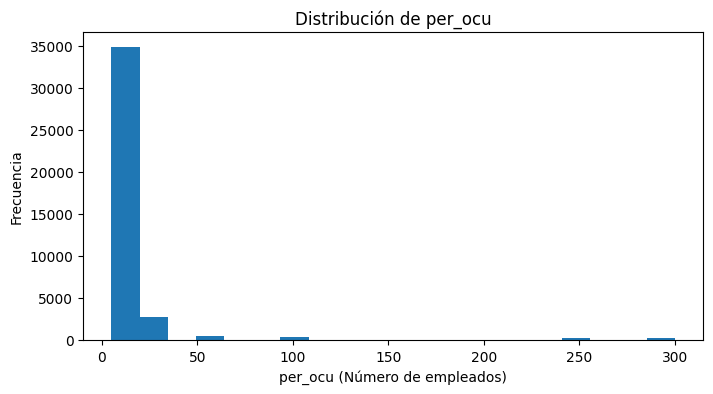

=== Estadísticos básicos (describe) ===
                 nom_estab                                         nombre_act  \
count                39040                                              39040   
unique               32068                                                743   
top     CONSULTORIO MEDICO  Comercio al por menor en tiendas de abarrotes,...   
freq                   226                                               2727   
mean                   NaN                                                NaN   
std                    NaN                                                NaN   
min                    NaN                                                NaN   
25%                    NaN                                                NaN   
50%                    NaN                                                NaN   
75%                    NaN                                                NaN   
max                    NaN                                           

In [22]:
# 📊 ANÁLISIS DESCRIPTIVO

# Seleccionamos solo las columnas de interés
cols = ['nom_estab','nombre_act','per_ocu','telefono','correoelec','www']
df_sel = df_chihuahua[cols].copy()

# Histograma de la variable per_ocu
import matplotlib.pyplot as plt

# Convertir 'per_ocu' a valor numerico
per_ocu_mapping = {
    '0 a 5 personas': 5,
    '6 a 10 personas': 10,
    '11 a 30 personas': 30,
    '31 a 50 personas': 50,
    '51 a 100 personas': 100,
    '101 a 250 personas': 250,
    '251 y más personas': 300
}
df_sel['per_ocu_numeric'] = df_sel['per_ocu'].map(per_ocu_mapping)

plt.figure(figsize=(8,4))
df_sel['per_ocu_numeric'].plot(kind='hist', bins=20, title='Distribución de per_ocu')
plt.xlabel('per_ocu (Número de empleados)')
plt.ylabel('Frecuencia')
plt.show()

# Estadísticos básicos para variables numéricas
print("=== Estadísticos básicos (describe) ===")
print(df_sel.describe(include='all'))
print()

# Tablas de frecuencia para variables categóricas
for c in ['nom_estab','nombre_act','www']:
    print(f"=== Frecuencias de {c} ===")
    print(df_sel[c].value_counts().head(25))  # top 25 valores
    print()

# Completeness: conteo de valores faltantes por columna
print("=== Datos faltantes por columna ===")
print(df_sel.isnull().sum())
print()

# Uniqueness: número de valores únicos por columna
print("=== Valores únicos por columna ===")
print(df_sel.nunique())
print()

# Consistency: chequeos básicos

# Teléfonos: formato numérico y longitud razonable (10 dígitos)
mask_tel = df_sel['telefono'].dropna().astype(str).str.replace('\\.0', '', regex=True).str.fullmatch(r'\d{10}')
print("=== Consistency teléfono ===")
print(f"Total teléfonos: {df_sel['telefono'].notnull().sum()}")
print(f"Teléfonos con formato correcto (10 dígitos): {mask_tel.sum()}")
print(f"Teléfonos con formato incorrecto: {(~mask_tel).sum()}")
print()


# URLs: empiezan con WWW
mask_www = df_sel['www'].dropna().astype(str).str.startswith(('WWW'))
print("=== Consistency www ===")
print(f"Total URLs: {df_sel['www'].notnull().sum()}")
print(f"URLs con formato correcto: {mask_www.sum()}")
print(f"URLs con formato incorrecto: {(~mask_www).sum()}")
print()

## 6) Preprocesamiento de los datos

In [23]:
# Filtrar registros donde 'nombre_act' contiene la frase 'comercio al por menor de ropa'
mask_nombre = df_chihuahua['nombre_act'].str.contains('comercio al por menor de ropa', case=False, na=False)

# Filtrar registros donde 'www' es nulo o vacío
mask_www = df_chihuahua['www'].isnull() | (df_chihuahua['www'].astype(str).str.strip() == '')

# Combinar ambos filtros
mask = mask_nombre & mask_www

# Contar cuántos registros cumplen ambas condiciones
conteo = mask.sum()
print(f"Cantidad de registros para comercio al por menor de ropa: {conteo}")

# Filtrar registros donde 'nombre_act' contiene la frase 'comercio al por mayor de ropa'
mask_nombre = df_chihuahua['nombre_act'].str.contains('comercio al por mayor de ropa', case=False, na=False)

# Filtrar registros donde 'www' es nulo o vacío
mask_www = df_chihuahua['www'].isnull() | (df_chihuahua['www'].astype(str).str.strip() == '')

# Combinar ambos filtros
mask = mask_nombre & mask_www

# Contar cuántos registros cumplen ambas condiciones
conteo = mask.sum()
print(f"Cantidad de registros para comercio al por mayor de ropa: {conteo}")

# Filtrar registros donde 'nombre_act' contiene la frase 'comercio al por menor de calzado'
mask_nombre = df_chihuahua['nombre_act'].str.contains('comercio al por menor de calzado', case=False, na=False)

# Filtrar registros donde 'www' es nulo o vacío
mask_www = df_chihuahua['www'].isnull() | (df_chihuahua['www'].astype(str).str.strip() == '')

# Combinar ambos filtros
mask = mask_nombre & mask_www

# Contar cuántos registros cumplen ambas condiciones
conteo = mask.sum()
print(f"Cantidad de registros para comercio al por menor de calzado: {conteo}")

# Filtrar registros donde 'nombre_act' contiene la frase 'comercio al por mayor de calzado'
mask_nombre = df_chihuahua['nombre_act'].str.contains('comercio al por mayor de calzado', case=False, na=False)

# Filtrar registros donde 'www' es nulo o vacío
mask_www = df_chihuahua['www'].isnull() | (df_chihuahua['www'].astype(str).str.strip() == '')

# Combinar ambos filtros
mask = mask_nombre & mask_www

# Contar cuántos registros cumplen ambas condiciones
conteo = mask.sum()
print(f"Cantidad de registros para comercio al por mayor de calzado: {conteo}")


Cantidad de registros para comercio al por menor de ropa: 878
Cantidad de registros para comercio al por mayor de ropa: 8
Cantidad de registros para comercio al por menor de calzado: 193
Cantidad de registros para comercio al por mayor de calzado: 2


# **RETROALIMENTACIÓN DE LA EXPOSICIÓN-9-29-2025**

In [24]:
# Filtro donde 'www' es nulo o vacío
mask_www_na = df_sel['www'].isnull() | (df_sel['www'].astype(str).str.strip() == '')

# Rango y conteo usando 'per_ocu_numeric'
rangos = [
    (0, 5, '0 a 5 - MicroEmpresa'),
    (6, 10, '6 a 10 - MicroEmpresa'),
    (11, 30, '11 a 30 - Empresa Pequeña'),
    (31, 50, '31 a 50 - Empresa Pequeña'),
    (51, 100, '51 a 100 - Empresa Mediana'),
    (101, 250, '101 a 250 Empresa Mediana'),
    (251, 10000, '251 o más Empresa Grande')
]

# Calcular el total de registros sin www
total_sin_www = mask_www_na.sum()

print('Conteo de registros por el # de personal empleado comparando al mismo tiempo que no tenga página web')
print(f'Total de registros sin página web: {total_sin_www}')
print('-' * 80)

# Variables para acumular las agrupaciones combinadas
micro_total = 0        # 0-10
pequena_total = 0      # 11-50
mediana_total = 0      # 51-250
grande_total = 0       # >250

for min_val, max_val, nombre_rango in rangos:
    mask_rango = (df_sel['per_ocu_numeric'] >= min_val) & (df_sel['per_ocu_numeric'] <= max_val)
    total = (mask_rango & mask_www_na).sum()
    porcentaje = (total / total_sin_www) * 100 if total_sin_www > 0 else 0

    # Acumular para las agrupaciones
    if max_val <= 10:
        micro_total += total
    elif max_val <= 50:
        pequena_total += total
    elif max_val <= 250:
        mediana_total += total
    elif max_val > 250:
        grande_total += total

    print(f'{nombre_rango}: {total} ({porcentaje:.1f}%)')

print('\n' + '=' * 80)
print('RESUMEN POR AGRUPACIONES COMBINADAS:')
print('=' * 80)

# Calcular porcentajes para las agrupaciones combinadas
micro_porcentaje = (micro_total / total_sin_www) * 100 if total_sin_www > 0 else 0
pequena_porcentaje = (pequena_total / total_sin_www) * 100 if total_sin_www > 0 else 0
mediana_porcentaje = (mediana_total / total_sin_www) * 100 if total_sin_www > 0 else 0
grande_porcentaje = (grande_total / total_sin_www) * 100 if total_sin_www > 0 else 0

print(f'MicroEmpresas (0-10 empleados): {micro_total} ({micro_porcentaje:.1f}%)')
print(f'Empresas Pequeñas (11-50 empleados): {pequena_total} ({pequena_porcentaje:.1f}%)')
print(f'Empresas Medianas (51-250 empleados): {mediana_total} ({mediana_porcentaje:.1f}%)')
print(f'Empresas Grandes (250 o más empleados): {grande_total} ({grande_porcentaje:.1f}%)')

Conteo de registros por el # de personal empleado comparando al mismo tiempo que no tenga página web
Total de registros sin página web: 34418
--------------------------------------------------------------------------------
0 a 5 - MicroEmpresa: 29134 (84.6%)
6 a 10 - MicroEmpresa: 2812 (8.2%)
11 a 30 - Empresa Pequeña: 1773 (5.2%)
31 a 50 - Empresa Pequeña: 317 (0.9%)
51 a 100 - Empresa Mediana: 194 (0.6%)
101 a 250 Empresa Mediana: 111 (0.3%)
251 o más Empresa Grande: 77 (0.2%)

RESUMEN POR AGRUPACIONES COMBINADAS:
MicroEmpresas (0-10 empleados): 31946 (92.8%)
Empresas Pequeñas (11-50 empleados): 2090 (6.1%)
Empresas Medianas (51-250 empleados): 305 (0.9%)
Empresas Grandes (250 o más empleados): 77 (0.2%)


Media general de per_ocu_numeric (solo registros SIN www): 9.10
Total de registros sin www: 34418

MEDIAS POR RANGOS (solo registros SIN www):
MicroEmpresas (0-10): 5.44 (n=31946)
Pequeñas (11-50): 33.03 (n=2090)
Medianas (51-250): 154.59 (n=305)


/tmp/ipython-input-1490777744.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(datos_rangos, vert=True, labels=[etiq.split('(')[0] for etiq in etiquetas_rangos])


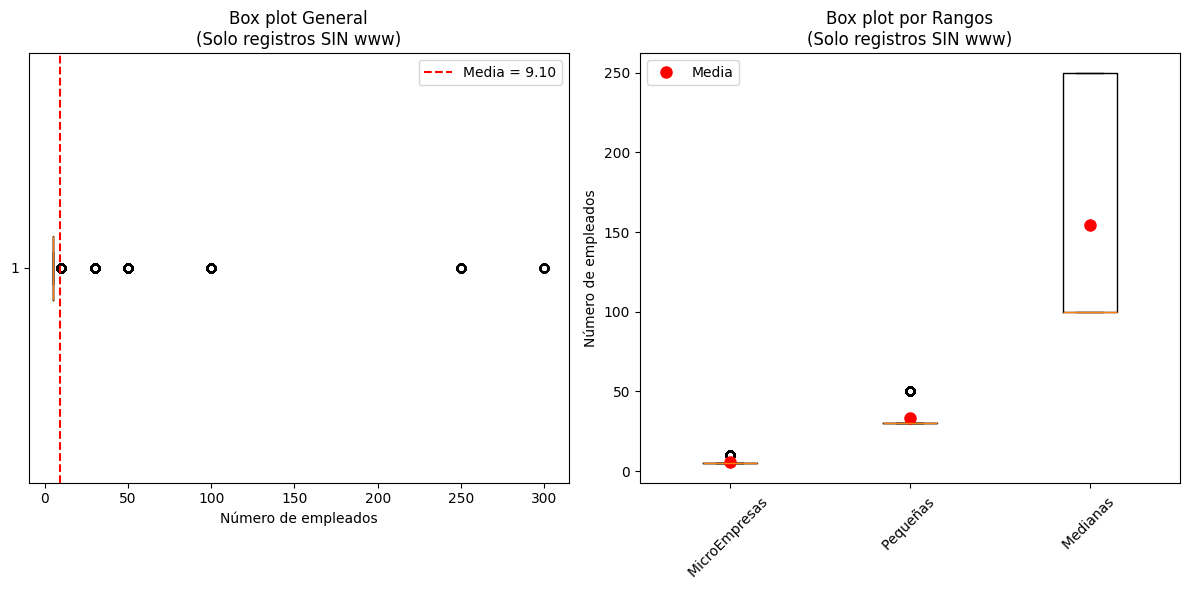


RESUMEN DE MEDIAS POR TIPO DE EMPRESA (SIN www):
MicroEmpresas (0-10): 5.44
Pequeñas (11-50): 33.03
Medianas (51-250): 154.59


In [25]:
# Filtro donde 'www' es nulo o vacío
mask_www_na = df_sel['www'].isnull() | (df_sel['www'].astype(str).str.strip() == '')

# Definir los rangos agrupados
rangos_agrupados = [
    (0, 10, 'MicroEmpresas (0-10)'),
    (11, 50, 'Pequeñas (11-50)'),
    (51, 250, 'Medianas (51-250)')
]

# Calcular la media general solo de registros SIN www
datos_sin_www = df_sel[mask_www_na]['per_ocu_numeric'].dropna()
media_general_sin_www = datos_sin_www.mean()
print(f"Media general de per_ocu_numeric (solo registros SIN www): {media_general_sin_www:.2f}")
print(f"Total de registros sin www: {len(datos_sin_www)}")
print("\n" + "="*60)
print("MEDIAS POR RANGOS (solo registros SIN www):")
print("="*60)

# Almacenar datos para el box plot
datos_rangos = []
etiquetas_rangos = []
medias_rangos = []

for min_val, max_val, nombre_rango in rangos_agrupados:
    # Filtrar por rango Y por ausencia de www
    mask_rango = (df_sel['per_ocu_numeric'] >= min_val) & (df_sel['per_ocu_numeric'] <= max_val)
    mask_combinado = mask_rango & mask_www_na
    datos_rango = df_sel[mask_combinado]['per_ocu_numeric'].dropna()

    if len(datos_rango) > 0:
        media_rango = datos_rango.mean()
        medias_rangos.append(media_rango)
        datos_rangos.append(datos_rango)
        etiquetas_rangos.append(nombre_rango)
        print(f"{nombre_rango}: {media_rango:.2f} (n={len(datos_rango)})")
    else:
        print(f"{nombre_rango}: Sin datos")

# Box plot por rangos (solo registros sin www)
plt.figure(figsize=(12, 6))

# Subplot 1: Box plot general (solo sin www)
plt.subplot(1, 2, 1)
plt.boxplot(datos_sin_www, vert=False)
plt.title('Box plot General\n(Solo registros SIN www)')
plt.xlabel('Número de empleados')
plt.axvline(media_general_sin_www, color='red', linestyle='--', label=f'Media = {media_general_sin_www:.2f}')
plt.legend()

# Subplot 2: Box plot por rangos (solo sin www)
plt.subplot(1, 2, 2)
if datos_rangos:
    bp = plt.boxplot(datos_rangos, vert=True, labels=[etiq.split('(')[0] for etiq in etiquetas_rangos])
    plt.title('Box plot por Rangos\n(Solo registros SIN www)')
    plt.ylabel('Número de empleados')
    plt.xticks(rotation=45)

    # Agregar las medias como puntos rojos
    for i, media in enumerate(medias_rangos):
        plt.plot(i+1, media, 'ro', markersize=8, label='Media' if i == 0 else "")

    plt.legend()

plt.tight_layout()
plt.show()

# Tabla resumen de medias
print("\n" + "="*60)
print("RESUMEN DE MEDIAS POR TIPO DE EMPRESA (SIN www):")
print("="*60)
for i, (nombre, media) in enumerate(zip(etiquetas_rangos, medias_rangos)):
    print(f"{nombre}: {media:.2f}")


## 7) Conclusiones parciales
- Principales hallazgos en calidad, análisis descriptivo y preprocesamiento.

- ¿Dentro de la ciudad de Chihuahua cuantos negocios cuentan con página web y cuales no?

Esa pregunta se resolvió a través de analizar los datos faltantes en la columna WWW que dio 34,418.

- ¿Donde existe mayor area de oportunidad en la ropa o en el calzado?

Se hizo una filtración de datos dentro de la columna nombre_act que representa de acuerdo al diccionario de la INEGI el Nombre del código de actividad conforme al SCIAN 2018 y obtuvimos 2 rubros importantes comercio al por menor y mayor de ropa y de calzado dándonos un total de 878+8=886 Posibles prospectos para la ropa y para lo que es el calzado 193+2=195 Posibles prospectos.
Por lo tanto la ropa es mejor rubro para buscar posibles clientes.

- ¿Cúal es el total de posibles clientes entre la ropa y el calzado sin página web?

Serian 886+195=1081 posibles prospectos en la ciudad de Cihuahua a los que una página web les pueda servir.

- Estado de preparación del dataset para fases posteriores.

Para futuras preparaciones estaría bien integrar y juntar las columnas tipo_v_e_1+nom_v_e_1, las columnas tipo_v_e_2+nom_v_e_2 y tipo_v_e_3+nom_v_e_3.

# **CONCLUSION ADICIONAL DESPUES DE LA RETROALIMENTACIÓN-9-29-2025**

Podemos comprobar que las empresas sin página web en su mayoria pertenecen a MicroEmpresas (0-10 empleados): 31946 (92.8%).

La media no puede ser calculada de manera correcta, ya que se identificó otra limitante en la columna de las personas que trabajan, en donde el # de personal viene por rango y no por el número exacto de personas que trabajan, por lo que las únicas media que se puede obtener es del rango en que se clasifica el dataset, también no se incluye empresas grandes porque el rango tiene a infinito.
El boxplot solo se utilizo como referencia para ver de manera visual el rango de los datos junto con su media.